<a href="https://colab.research.google.com/github/Jatin1895470/DLA3/blob/main/Copy_of_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


ticker_symbol = "RELIANCE.NS"


data = yf.download(ticker_symbol, start="2016-01-01", end="2023-11-16")


data.reset_index(inplace=True)


print(data.head())

data.info()


[*********************100%%**********************]  1 of 1 completed
        Date        Open        High         Low       Close   Adj Close  \
0 2016-01-01  500.158997  504.666260  499.366516  502.907928  481.838531   
1 2016-01-04  497.781525  502.140198  488.717438  492.977081  472.323700   
2 2016-01-05  495.453583  500.258057  493.819092  497.855835  476.998047   
3 2016-01-06  499.069336  514.324707  495.503113  511.253815  489.834717   
4 2016-01-07  505.731171  509.173553  499.292206  501.867798  480.841949   

     Volume  
0   2499742  
1  13923887  
2   6897687  
3  12349673  
4   9109980  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1945 non-null   datetime64[ns]
 1   Open       1945 non-null   float64       
 2   High       1945 non-null   float64       
 3   Low        1945 non-null   float64       
 4

2.Spliting Data as Train and Validation

In [ ]:
length_data = len(data)
split_ratio = 0.7
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length:", length_data)
print("Train data length:", length_train)
print("Validation data length:", length_validation)

train_data = data[:length_train].iloc[:, :2]
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data


Data length: 1945
Train data length: 1362
Validation data length: 583


,Date,Open
0,2016-01-01,500.158997
1,2016-01-04,497.781525
2,2016-01-05,495.453583
3,2016-01-06,499.069336
4,2016-01-07,505.731171
...,...,...
1357,2021-07-02,2097.000000
1358,2021-07-05,2136.449951
1359,2021-07-06,2144.949951
1360,2021-07-07,2127.750000


In [ ]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])
validation_data

,Date,Open
1362,2021-07-09,2088.000000
1363,2021-07-12,2079.750000
1364,2021-07-13,2100.000000
1365,2021-07-14,2100.350098
1366,2021-07-15,2095.000000
...,...,...
1940,2023-11-08,2332.000000
1941,2023-11-09,2335.850098
1942,2023-11-10,2305.550049
1943,2023-11-13,2322.899902


3.Creating Train Dataset from Train split

In [ ]:
dataset_train = train_data.Open.values
dataset_train.shape

(1362,)

In [ ]:

dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1362, 1)

4.Normalization / Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))



dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(1362, 1)

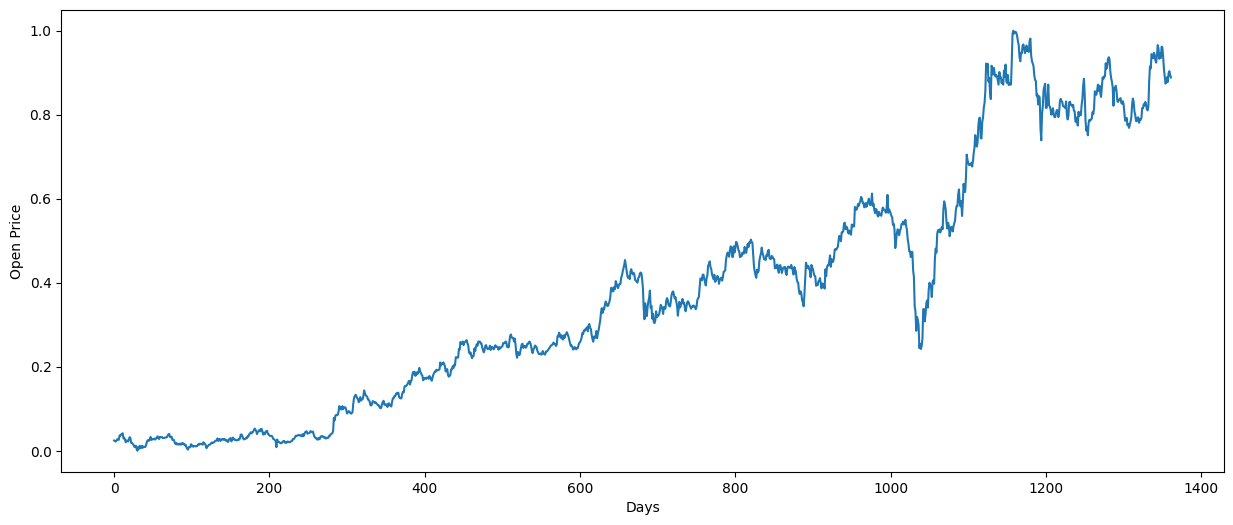

In [ ]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days")
plt.ylabel("Open Price")
plt.show()

5.Creating X_train and y_train from Train data

In [ ]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])


X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (1312, 50)
Shape of y_train before reshape : (1312,)


Reshape

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (1312, 50, 1)
Shape of y_train after reshape : (1312, 1)


In [ ]:
X_train[0]

array([[0.02431094],
       [0.02303978],
       [0.02179509],
       [0.02372833],
       [0.02729022],
       [0.02701215],
       [0.02593961],
       [0.03628102],
       [0.03577787],
       [0.03862474],
       [0.04018721],
       [0.04157753],
       [0.02939558],
       [0.03095804],
       [0.02636334],
       [0.02013994],
       [0.0243639 ],
       [0.02386074],
       [0.02198047],
       [0.02673409],
       [0.03229543],
       [0.02973985],
       [0.01853774],
       [0.01853774],
       [0.01618081],
       [0.01406221],
       [0.00924239],
       [0.0089246 ],
       [0.0118774 ],
       [0.00421071],
       [0.        ],
       [0.00876571],
       [0.0045285 ],
       [0.01190388],
       [0.00582615],
       [0.00691193],
       [0.01194361],
       [0.00712379],
       [0.00958666],
       [0.00926887],
       [0.00881867],
       [0.01236733],
       [0.01983539],
       [0.0243639 ],
       [0.02542319],
       [0.02370185],
       [0.02701215],
       [0.032

In [ ]:
y_train[0]

array([0.02807145])

6.Creating RNN model

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout


regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True,
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50,
              activation = "tanh",
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
41/41 [==============================] - 6s 46ms/step - loss: 0.3280 - accuracy: 7.6220e-04
Epoch 2/50
41/41 [==============================] - 3s 68ms/step - loss: 0.2141 - accuracy: 0.0000e+00
Epoch 3/50
41/41 [==============================] - 2s 51ms/step - loss: 0.1598 - accuracy: 7.6220e-04
Epoch 4/50
41/41 [==============================] - 3s 66ms/step - loss: 0.1237 - accuracy: 7.6220e-04
Epoch 5/50
41/41 [==============================] - 4s 88ms/step - loss: 0.0823 - accuracy: 7.6220e-04
Epoch 6/50
41/41 [==============================] - 2s 44ms/step - loss: 0.0689 - accuracy: 7.6220e-04
Epoch 7/50
41/41 [==============================] - 2s 45ms/step - loss: 0.0547 - accuracy: 0.0000e+00
Epoch 8/50
41/41 [==============================] - 2s 45ms/step - loss: 0.0491 - accuracy: 7.6220e-04
Epoch 9/50
41/41 [==============================] - 2s 46ms/step - loss: 0.0345 - accuracy: 7.6220e-04
Epoch 10/50
41/41 [==============================] - 2s 49ms/step - loss:

7.Evaluating Model

In [ ]:
history.history["loss"]

[0.32795676589012146,
 0.21406148374080658,
 0.15981560945510864,
 0.12372738867998123,
 0.08230337500572205,
 0.06894411891698837,
 0.05468092858791351,
 0.04911210015416145,
 0.034520164132118225,
 0.03273402899503708,
 0.02941076084971428,
 0.02716277353465557,
 0.021472236141562462,
 0.02157401107251644,
 0.01912037655711174,
 0.016926927492022514,
 0.016059614717960358,
 0.013530694879591465,
 0.014237992465496063,
 0.014886099845170975,
 0.01140855997800827,
 0.010600072331726551,
 0.010352679528295994,
 0.009389618411660194,
 0.008359042927622795,
 0.00943814218044281,
 0.007860485464334488,
 0.00739365816116333,
 0.007289185654371977,
 0.00790491048246622,
 0.006536617409437895,
 0.006604609079658985,
 0.005577682983130217,
 0.005685960873961449,
 0.005249508656561375,
 0.005021806340664625,
 0.00485922722145915,
 0.004893446806818247,
 0.004975045099854469,
 0.004423351027071476,
 0.003971719648689032,
 0.0037064312491565943,
 0.003914393484592438,
 0.0038726700004190207,
 0.0

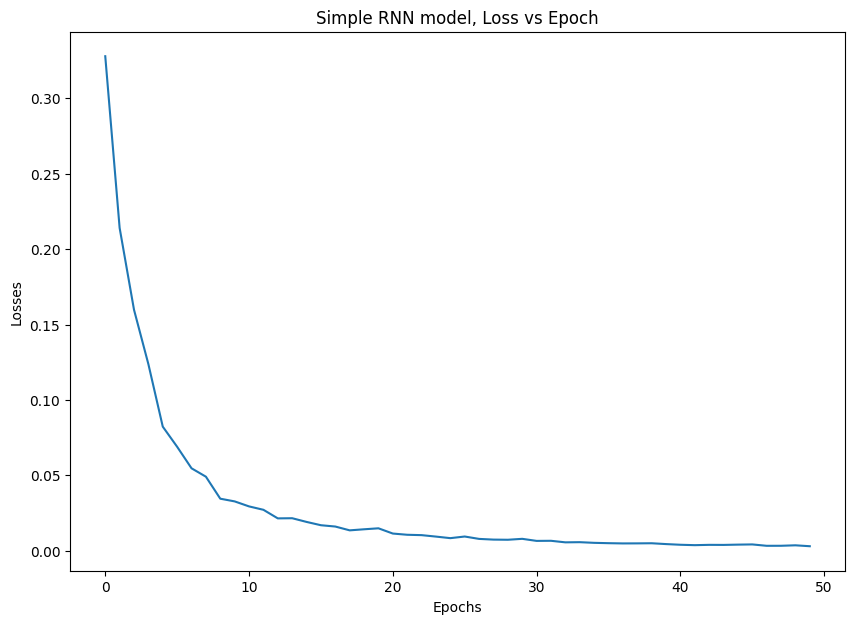

In [ ]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

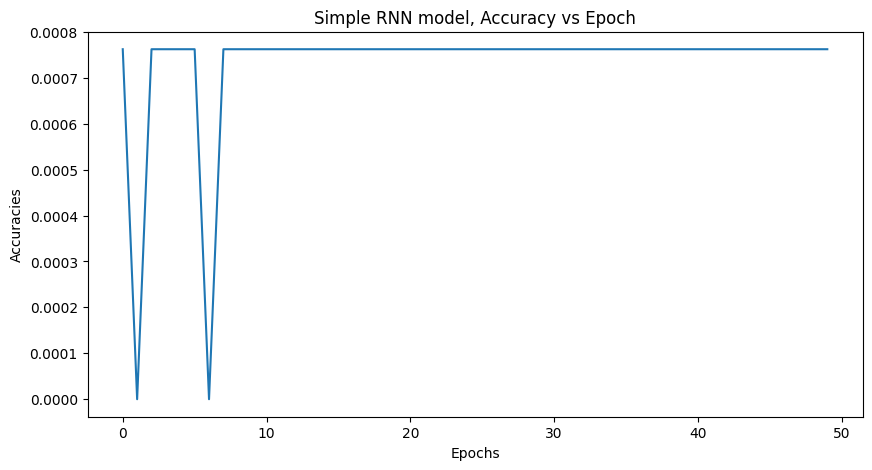

In [ ]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

Model predictions for train data

In [ ]:
y_pred = regressor.predict(X_train)
y_pred = scaler.inverse_transform(y_pred)
y_pred.shape

41/41 [==============================] - 1s 16ms/step


(1312, 1)

In [ ]:
y_train = scaler.inverse_transform(y_train)
y_train.shape

(1312, 1)

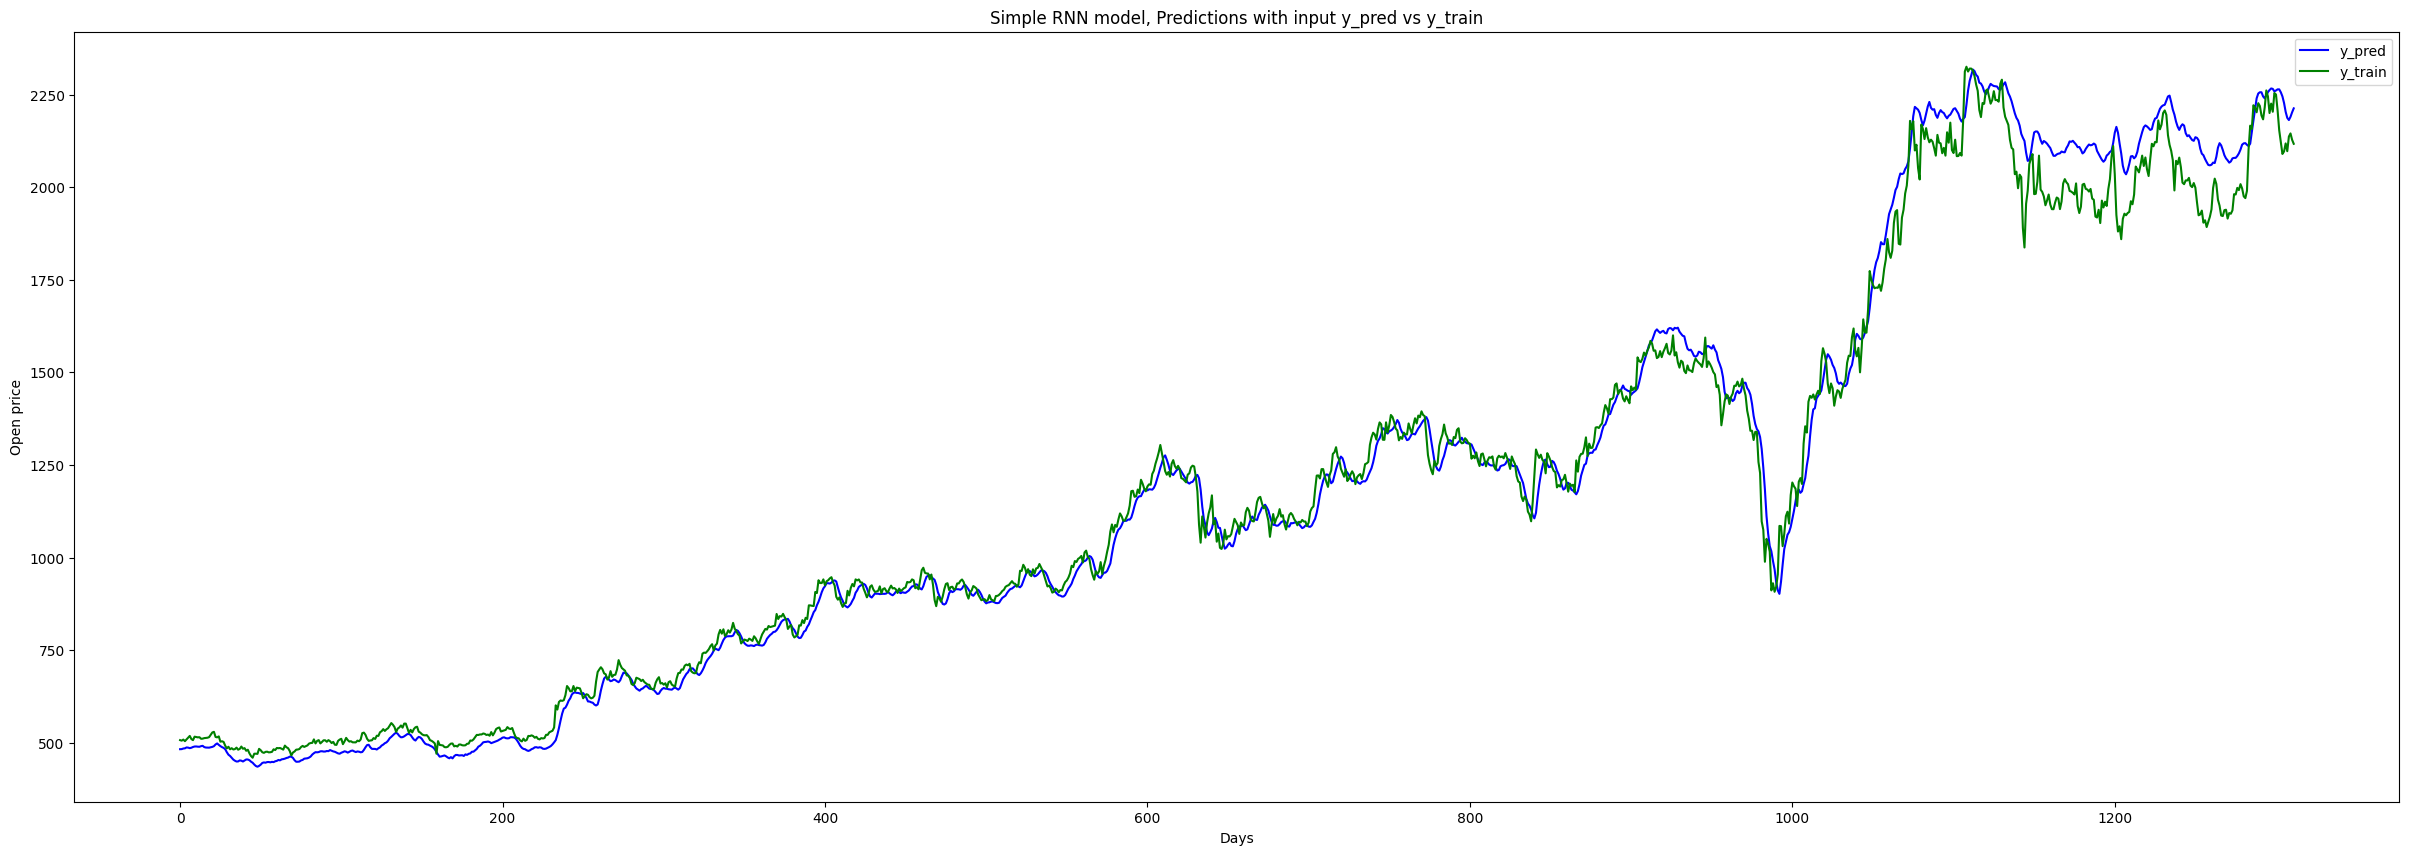

In [ ]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input y_pred vs y_train")
plt.legend()
plt.show()

8.Creating Test Dataset from Validation Data

Converting array and scaling

In [ ]:
dataset_validation = validation_data.Open.values
dataset_validation = np.reshape(dataset_validation, (-1,1))
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (583, 1)


Creating X_test and y_test

In [ ]:

X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

Converting to array

In [ ]:

X_test, y_test = np.array(X_test), np.array(y_test)

print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (533, 50)
Shape of y_test before reshape : (533,)


Reshape

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_test = np.reshape(y_test, (-1,1))

print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (533, 50, 1)
Shape of y_test after reshape : (533, 1)


9.Evaluating with Validation Data

In [ ]:

y_pred_of_test = regressor.predict(X_test)

y_pred_of_test = scaler.inverse_transform(y_pred_of_test)
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

17/17 [==============================] - 1s 27ms/step
Shape of y_pred_of_test : (533, 1)


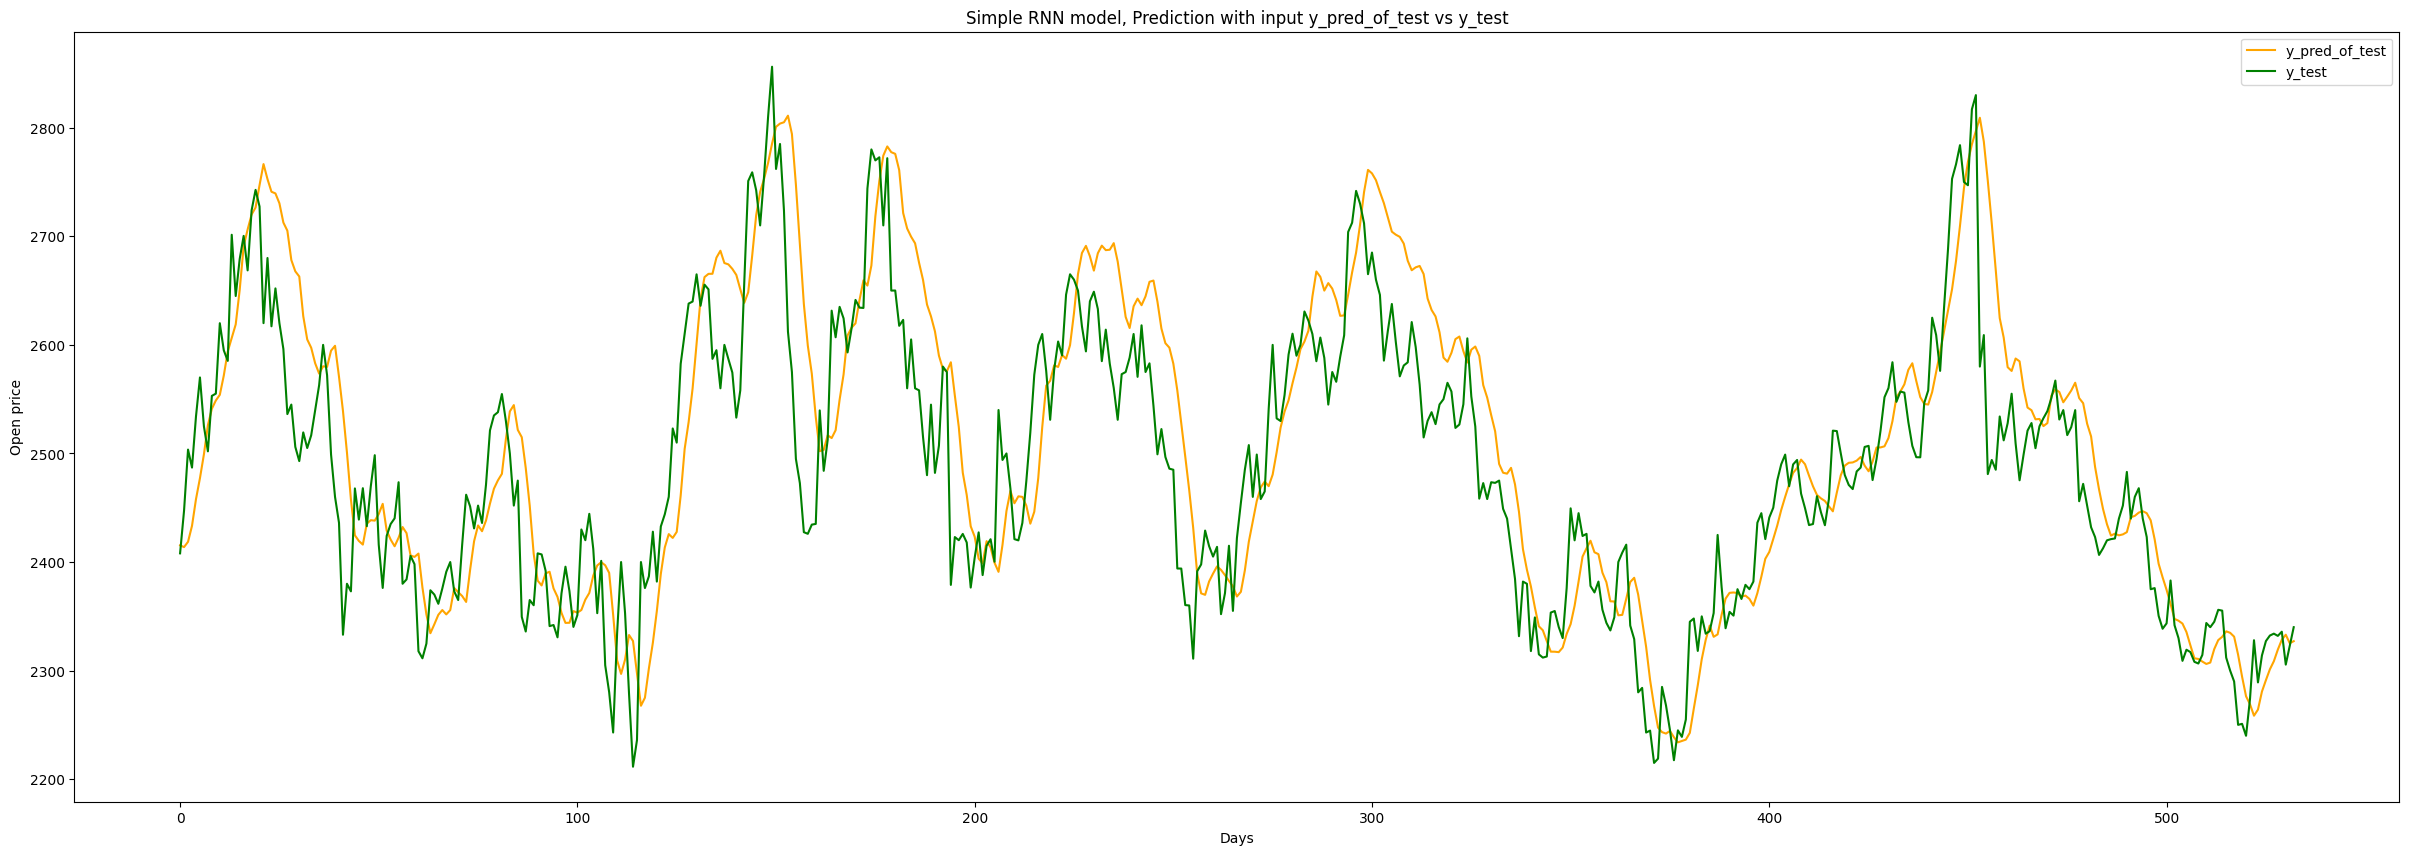

In [ ]:

plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input y_pred_of_test vs y_test")
plt.legend()
plt.show()

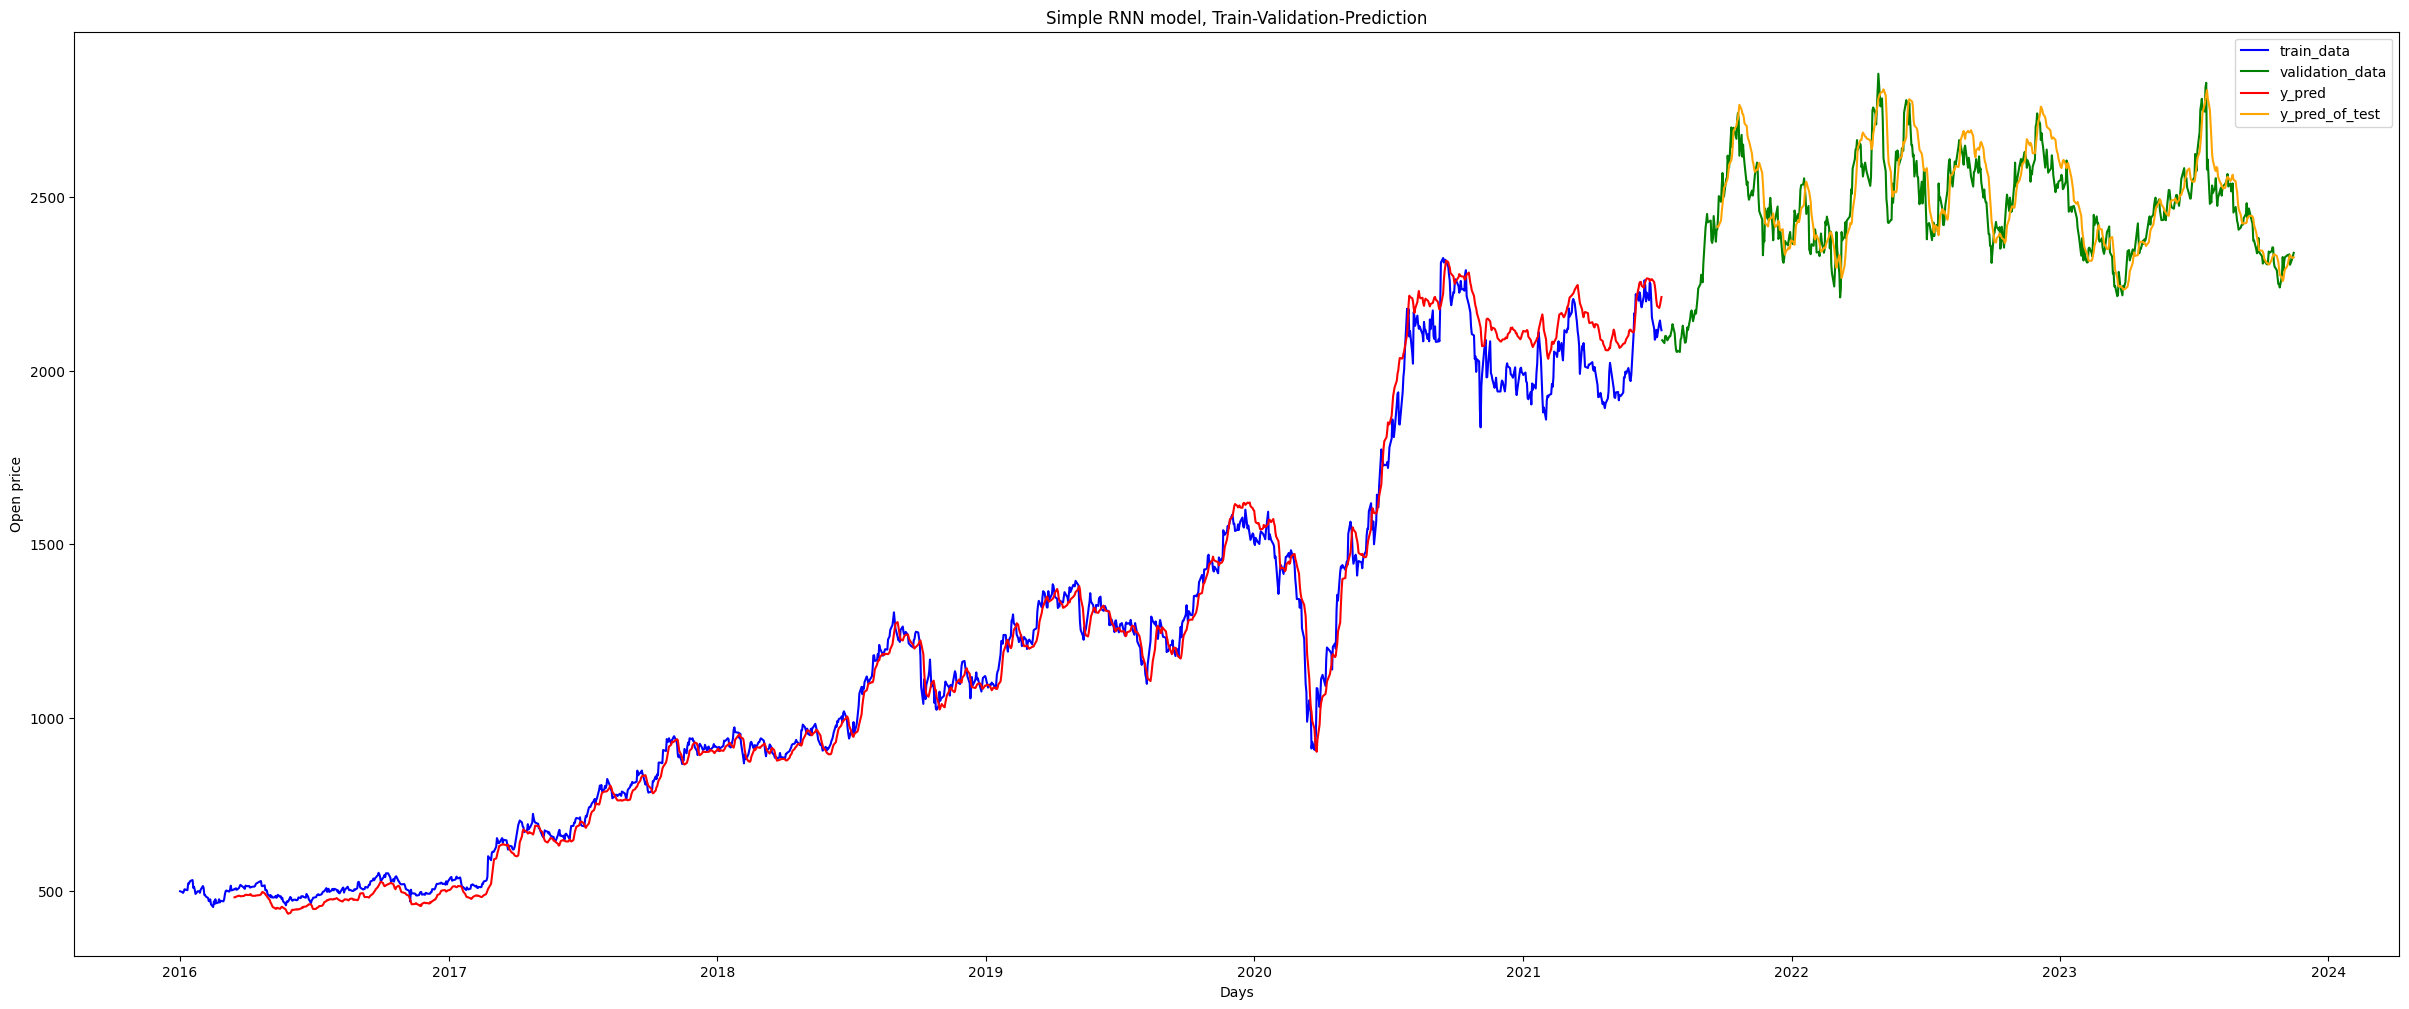

In [ ]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

10.Creating LSTM Model

In [ ]:
y_train = scaler.fit_transform(y_train)

In [ ]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1)))
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
132/132 [==============================] - 13s 63ms/step - loss: 0.0100 - accuracy: 0.0015
Epoch 2/10
132/132 [==============================] - 7s 50ms/step - loss: 0.0012 - accuracy: 0.0015
Epoch 3/10
132/132 [==============================] - 9s 70ms/step - loss: 9.9178e-04 - accuracy: 0.0015
Epoch 4/10
132/132 [==============================] - 7s 50ms/step - loss: 9.3229e-04 - accuracy: 0.0015
Epoch 5/10
132/132 [==============================] - 8s 62ms/step - loss: 8.8564e-04 - accuracy: 0.0015
Epoch 6/10
132/132 [==============================] - 7s 54ms/step - loss: 8.0294e-04 - accuracy: 0.0015
Epoch 7/10
132/132 [==============================] - 8s 62ms/step - loss: 0.0010 - accuracy: 0.0015
Epoch 8/10
132/132 [==============================] - 7s 55ms/step - loss: 6.8100e-04 - accuracy: 0.0015
Epoch 9/10
132/132 [==============================] - 8s 58ms/step - loss: 5.7305e-04 - accuracy: 0.0015
Epoch 10/10
132/132 [==============================] - 8s 61ms/ste

11.Evaluating LSTM Model

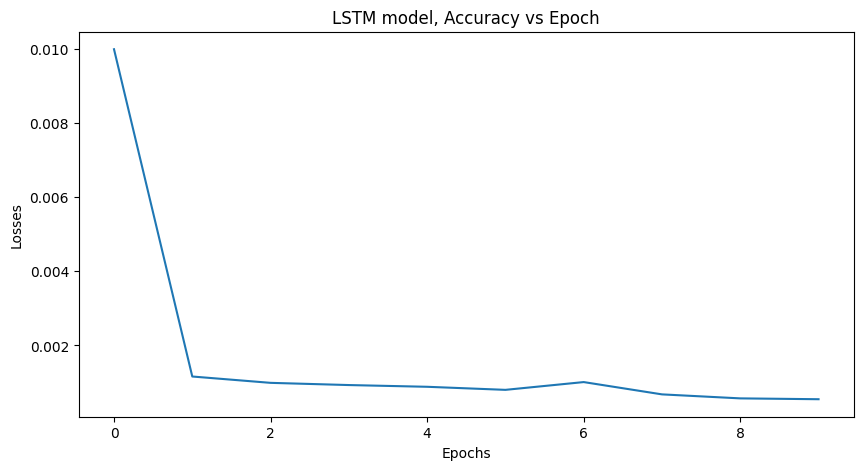

In [ ]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

17/17 [==============================] - 1s 18ms/step


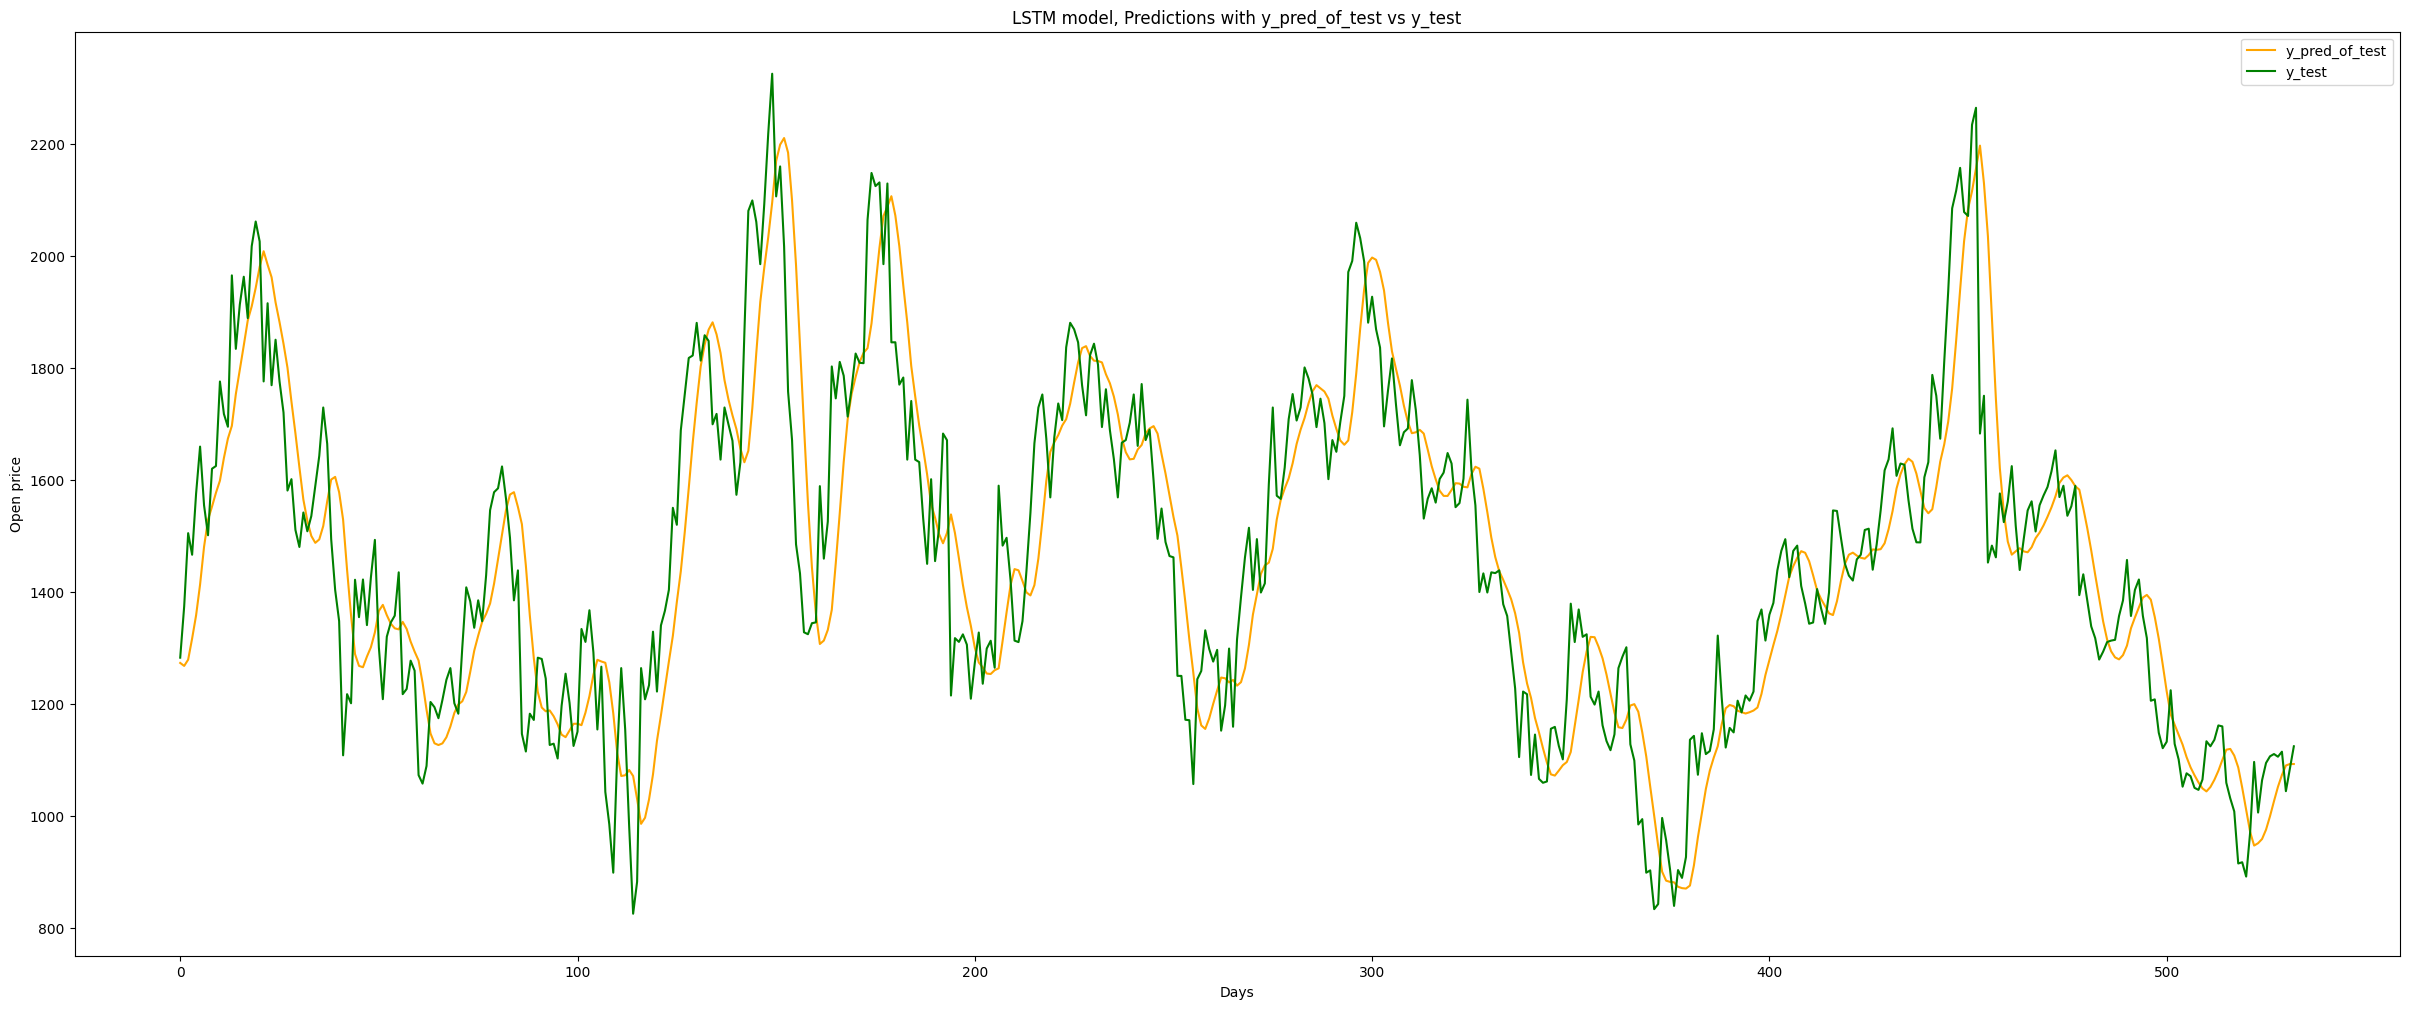

In [ ]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with y_pred_of_test vs y_test")
plt.legend()
plt.show()

12.Future price prediction

In [ ]:
#last date of data
data.iloc[-1]


Date         2023-11-15 00:00:00
Open                      2340.0
High                 2361.949951
Low                       2327.0
Close                2356.449951
Adj Close            2356.449951
Volume                   6110324
Name: 1944, dtype: object

In [ ]:



X_input = data.iloc[-time_step:].Open.values
X_input = scaler.fit_transform(X_input.reshape(-1,1))
X_input = np.reshape(X_input, (1,50,1))
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.68539115],
        [0.71049343],
        [0.74074074],
        [0.74526789],
        [0.74773642],
        [0.82304527],
        [0.87242798],
        [1.        ],
        [0.82304527],
        [0.90534979],
        [0.9382716 ],
        [0.82325123],
        [0.75329238],
        [0.55534959],
        [0.55967078],
        [0.45432059],
        [0.40555576],
        [0.42592593],
        [0.58847737],
        [0.41893024],
        [0.37016441],
        [0.28395062],
        [0.32613169],
        [0.31707839],
        [0.28024732],
        [0.27386851],
        [0.3063784 ],
        [0.42736666],
        [0.41152263],
        [0.43209877],
        [0.47736626],
        [0.47427984],
        [0.2962963 ],
        [0.24691358],
        [0.20576132],
        [0.04135823],
        [0.04526749],
        [0.        ],
        [0.1399177 ],
        [0.36213992],
        [0.20226297],
        [0.30432079],
        [0.35884754],
        [0.37983559],
        [0.38703724],
        [0

In [ ]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
print("Simple RNN, Open price prediction for 16/11/2023      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 16/11/2023 :", LSTM_prediction[0,0])

1/1 [==============================] - 0s 32ms/step
Simple RNN, Open price prediction for 16/11/2023      : 2335.304
LSTM prediction, Open price prediction for 16/11/2023 : 2330.4314


In [ ]:
#Actual open price on 16



ticker_symbol = "RELIANCE.NS"


desired_date = "2023-11-16"


data = yf.download(ticker_symbol, start="2018-01-01", end="2023-11-17")


data.reset_index(inplace=True)


data['Date'] = pd.to_datetime(data['Date'])


desired_date_data = data[data['Date'] == desired_date]

if not desired_date_data.empty:
    opening_price = desired_date_data['Open'].values[0]
    print(f"The opening price of Reliance on {desired_date} was: {opening_price}")
else:
    print(f"No data available for {desired_date}")



[*********************100%%**********************]  1 of 1 completed
The opening price of Reliance on 2023-11-16 was: 2351.10009765625
